<a href="https://colab.research.google.com/github/Tsyhankova/goit_python/blob/main/Hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import leastsq
from scipy.optimize import minimize_scalar

In [2]:
α = 0.5
β = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

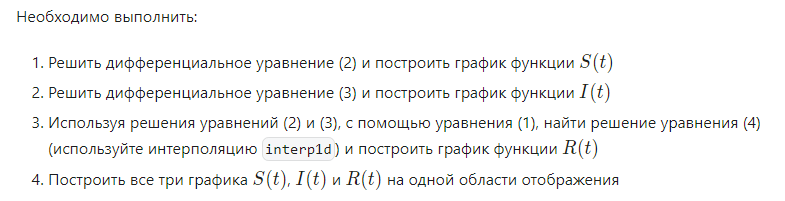

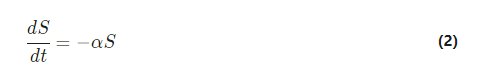

In [3]:
α=0.5
S0=990000
t0, tf = 0, 25


def dSdt(t, S):
  return -α*S

susceptible = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
print(susceptible)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f9e47778810>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


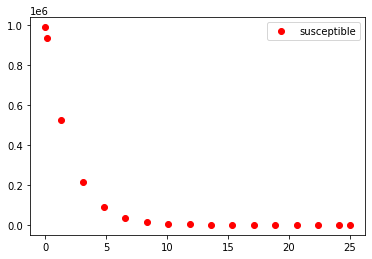

In [4]:
susceptible = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
t, y = susceptible.t, susceptible.y[0]
plt.plot(t, y, 'o', color='r', label='susceptible')
plt.legend()
plt.show()

In [5]:
susceptible.y

array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])

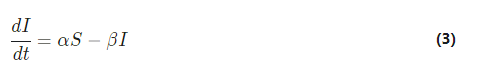

In [6]:
susceptible.sol(t)

array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])

In [7]:
α = 0.5
β = 0.3
S0 = 990000
I0 = 7000
t0, tf = 0, 25

def dIdt(t, I):
  return α*susceptible.sol(t) - β*I
    
infected = solve_ivp(dIdt, (t0, tf), [I0], t_eval=susceptible.t, dense_output=True)
print(infected)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f9e46d73450>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[  7000.        ,  61071.13488556, 383092.98656702,
        455094.08359669, 362498.07477816, 252950.3154034 ,
        165481.84134909, 104351.72190373,  64425.68330976,
         39176.1129074 ,  23615.96978429,  14145.95845236,
          8430.88989338,   5015.75994715,   2973.19116528,
          1762.40312942,   1367.85128541]])
 y_events: None


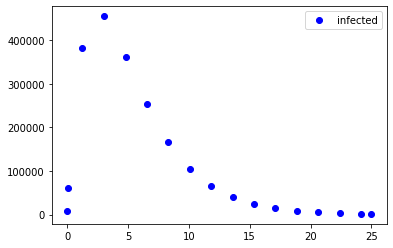

In [8]:
infected = solve_ivp(dIdt, (t0, tf), [I0], t_eval=susceptible.t)
t, y = infected.t, infected.y[0]
plt.plot(t, y, 'o', color='b', label='infected')
plt.legend()

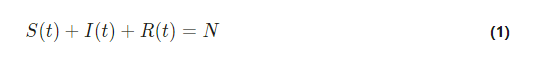

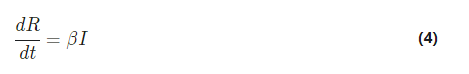

In [9]:
infected.y[0]

array([  7000.        ,  61071.13488556, 383092.98656702, 455094.08359669,
       362498.07477816, 252950.3154034 , 165481.84134909, 104351.72190373,
        64425.68330976,  39176.1129074 ,  23615.96978429,  14145.95845236,
         8430.88989338,   5015.75994715,   2973.19116528,   1762.40312942,
         1367.85128541])

In [10]:
#R(t) = N - S(t) - I(t)
r = [N]*17 - susceptible.y[0] - infected.y[0]
r

array([  3000.        ,   4187.36053163,  90568.09796411, 330456.05314529,
       548300.24717935, 709993.33826491, 819122.90542492, 889252.27123942,
       932917.07452186, 959719.92709788, 975925.38642323, 985663.4965004 ,
       991489.94756757, 994951.35174429, 997013.14530788, 998231.92034273,
       998628.43572803])

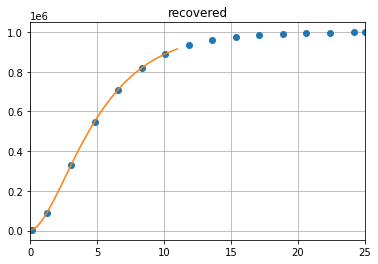

In [11]:
t = infected.t
R = interp1d(t, r, kind='cubic')

plt.plot(t, r, 'o')
more_date_R = np.linspace(0, 11, 10000)
plt.plot(more_date_R, R(more_date_R))
plt.xlim(0,25)
plt.title('recovered')
plt.grid()

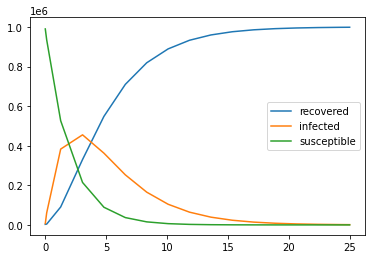

In [12]:
plt.plot(infected.t, r, infected.t, infected.y[0], susceptible.t, susceptible.y[0])
plt.legend(["recovered", "infected", "susceptible"])

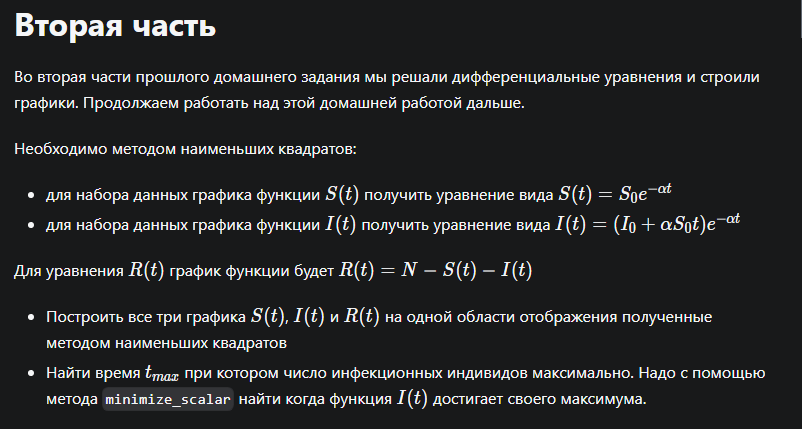

In [13]:
susceptible

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f9e4725aa10>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

In [14]:
y = susceptible.y[0]
t = susceptible.t
t, y

(array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
         6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
        15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
        24.15098721, 25.        ]),
 array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]))

In [15]:
def funcS(t, a, s):
  return s*(np.e**(-a*t))

In [16]:
def differenceS(p, y, t):
  a, s = p
  return y - funcS(t, a, s)

In [17]:
p0 = (0.3, 300000)
aprx, _  = leastsq(differenceS, p0, args=(y, t))
aprx, _

(array([4.99856001e-01, 9.89978640e+05]), 2)

In [18]:
yI = np.array(infected.y[0])
tI = np.array(infected.t)
s = aprx[1]

In [19]:
def funcI(tI, i, a):
  return (i + a*s*tI)*(np.e**(-a*tI))

In [20]:
def differenceI(p, yI, tI):
  i, a = p
  return yI - funcI(tI, i, a)

In [21]:
p0 = (30000, 0.7)
aprxI, _  = leastsq(differenceI, p0, args=(yI, tI))
aprxI, _

(array([5.60646736e+04, 3.41333951e-01]), 1)

In [22]:
#R(t) = N - S(t) - I(t)
N = 1000000

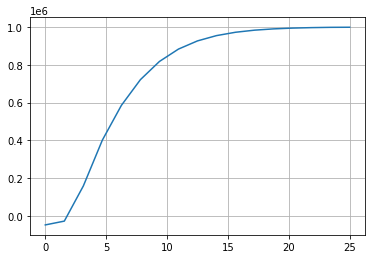

In [23]:
import matplotlib.pyplot as plt

x = np.linspace(0, 25, 17)
y = N - aprx[1]*(np.e**(-aprx[0]*t)) - (aprxI[0] + aprxI[1]*aprx[1]*tI)*(np.e**(-aprxI[1]*tI))

plt.grid()
plt.plot(x, y)

In [24]:
x

array([ 0.    ,  1.5625,  3.125 ,  4.6875,  6.25  ,  7.8125,  9.375 ,
       10.9375, 12.5   , 14.0625, 15.625 , 17.1875, 18.75  , 20.3125,
       21.875 , 23.4375, 25.    ])

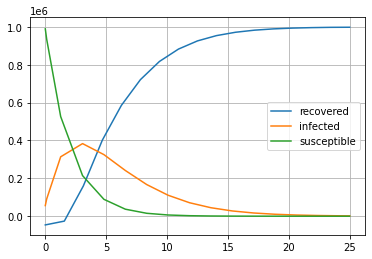

In [25]:
xS = np.array(susceptible.t)
yS = aprx[1]*(np.e**(-aprx[0]*t))

xI = np.array(infected.t)
yI = (aprxI[0] + aprxI[1]*aprx[1]*tI)*(np.e**(-aprxI[1]*tI))

xR = np.linspace(0, 25, 17)
yR = N - aprx[1]*(np.e**(-aprx[0]*t)) - (aprxI[0] + aprxI[1]*aprx[1]*tI)*(np.e**(-aprxI[1]*tI))

plt.plot(xR, yR, xI, yI, xS, yS)
plt.grid()
plt.legend(["recovered", "infected", "susceptible"])

In [26]:
i = aprxI[0]
a = aprxI[1]
tmax = minimize_scalar(lambda tI, i, a: - funcI(tI, i, a), bracket=(0, 2, 5), args=(i, a))
tmax

     fun: -385413.0329636925
    nfev: 15
     nit: 11
 success: True
       x: 2.763767879494889